<a href="https://colab.research.google.com/github/wonjae124/Capston/blob/colab/(22_05_13)Capston_Shelter_Animal_Outcomes_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHELTER ANIMAL OUTCOMES 
by Ebru Yaren Çatak

---



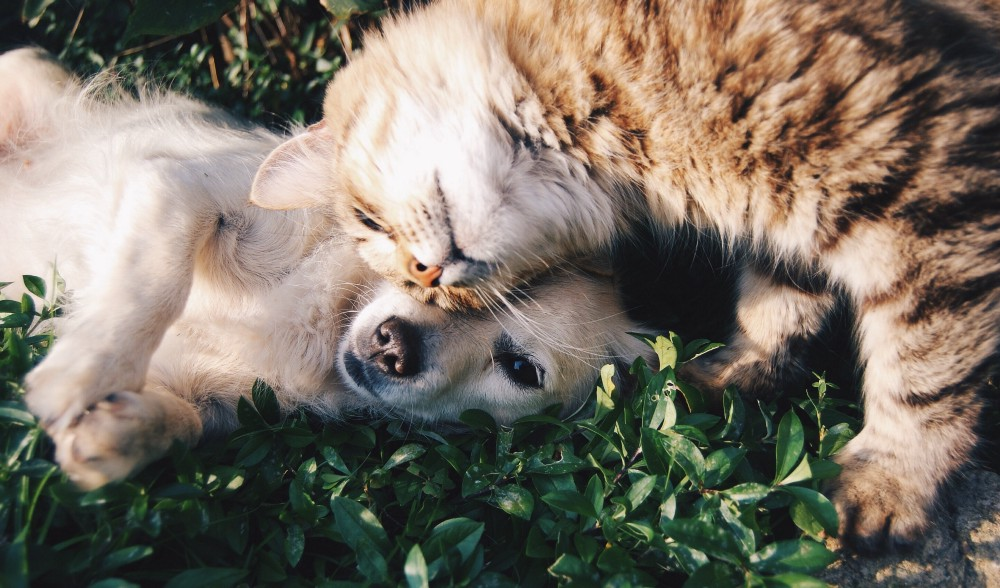

In [145]:
import numpy as np # linear algebra
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [146]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Train

In [147]:
train = pd.read_csv("/content/drive/My Drive/train.csv.gz")
train.columns = map(str.lower, train.columns)

In [148]:
train.name.unique().size

6375

In [149]:
train.describe()

,animalid,name,datetime,outcometype,outcomesubtype,animaltype,sexuponoutcome,ageuponoutcome,breed,color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animalid        26729 non-null  object
 1   name            19038 non-null  object
 2   datetime        26729 non-null  object
 3   outcometype     26729 non-null  object
 4   outcomesubtype  13117 non-null  object
 5   animaltype      26729 non-null  object
 6   sexuponoutcome  26728 non-null  object
 7   ageuponoutcome  26711 non-null  object
 8   breed           26729 non-null  object
 9   color           26729 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


## Test

In [151]:
test = pd.read_csv("/content/drive/My Drive/test.csv.gz")
test.columns = map(str.lower, test.columns)

In [152]:
test.shape

(11456, 8)

In [153]:
test.head()

,id,name,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [154]:
train.apply(lambda x: sum(x.isnull()/len(train)))

animalid          0.000000
name              0.287740
datetime          0.000000
outcometype       0.000000
outcomesubtype    0.509260
animaltype        0.000000
sexuponoutcome    0.000037
ageuponoutcome    0.000673
breed             0.000000
color             0.000000
dtype: float64

# Data Cleaning and Feature Selection

### Data Cleaning

In [155]:
train = train.drop(['animalid'], axis=1)

In [156]:
np.sum(train.isnull())

name               7691
datetime              0
outcometype           0
outcomesubtype    13612
animaltype            0
sexuponoutcome        1
ageuponoutcome       18
breed                 0
color                 0
dtype: int64

In [157]:
train.dropna(subset=['ageuponoutcome'], inplace=True)

In [158]:
train.dropna(subset=['sexuponoutcome'], inplace=True)

In [159]:
train = train.drop(['outcomesubtype'], axis=1)

### To Datetime

In [160]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

### NAME

In [161]:
def hasName(dataFrame):
  dataFrame["name"] = dataFrame["name"].fillna(0)
  dataFrame['hasName'] = dataFrame.name.apply(lambda x: 0 if x == 0 else 1)
  return dataFrame

In [162]:
train = hasName(train)
test = hasName(test)

In [163]:
train = train.drop(['name'], axis=1)
test = test.drop(['name'], axis=1)

In [164]:
test.head()

,id,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color,hasName
0,1,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,1
1,2,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,1
2,3,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,1
3,4,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,1
4,5,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


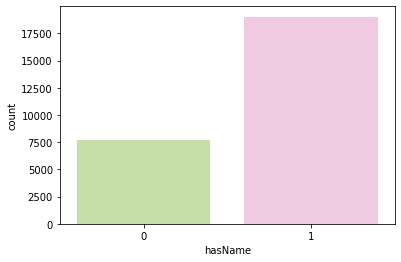

In [165]:
sns.countplot(train.hasName, palette='PiYG_r')

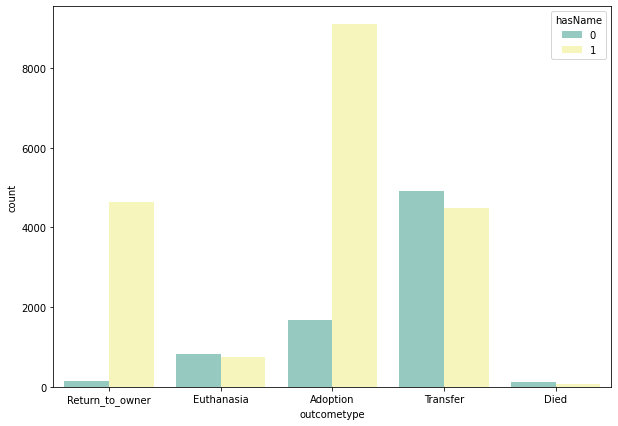

In [166]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='hasName', palette='Set3')

## AGE

In [167]:
train.ageuponoutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

### Age in Days

In [168]:
def calc_age_in_days(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 365
    if x.find('month')> -1: return age * 30
    if x.find('week')> -1: return age * 7
    if x.find('day')> -1: return age
    else: return 0

In [169]:
train['AgeInDays'] = train.ageuponoutcome.apply(calc_age_in_days)
test['AgeInDays'] = test.ageuponoutcome.apply(calc_age_in_days)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


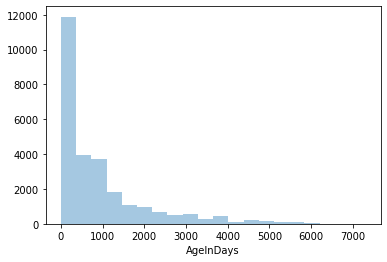

In [170]:
sns.distplot(train.AgeInDays, bins = 20, kde=False)

### Is a Puppy?

In [171]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [172]:
train = setPuppy(train)
test = setPuppy(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


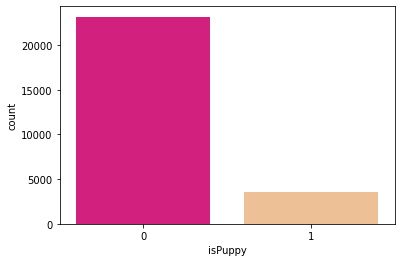

In [173]:
sns.countplot(train.isPuppy, palette='Accent_r')

In [174]:
train.head()

,datetime,outcometype,animaltype,sexuponoutcome,ageuponoutcome,breed,color,hasName,AgeInDays,isPuppy
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,365,0
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,365,0
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,730,0
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,21,1
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,730,0


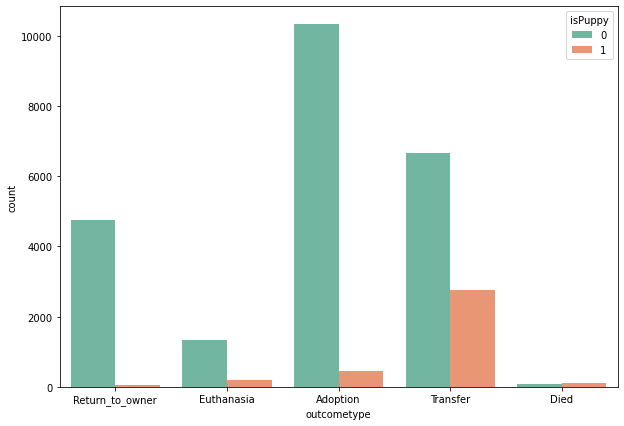

In [175]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='isPuppy', palette='Set2')

### Age in Months

In [176]:
def calc_age_in_months(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 12
    if x.find('month')> -1: return age 
    if x.find('week')> -1: return 0
    if x.find('day')> -1: return 0
    else: return 0

In [177]:
train['AgeInMonths'] = train.ageuponoutcome.apply(calc_age_in_months)
test['AgeInMonths'] = test.ageuponoutcome.apply(calc_age_in_months)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


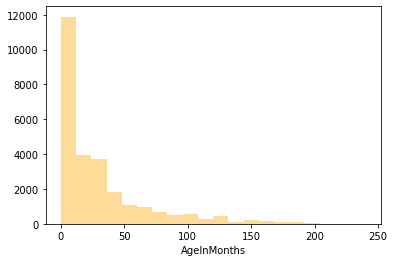

In [178]:
sns.distplot(train.AgeInMonths, bins = 20, kde=False, color='orange')

### Age In Years

In [179]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return 0 
    if x.find('week')> -1: return 0
    if x.find('day')> -1: return 0
    else: return 0
train['AgeInYears'] = train.ageuponoutcome.apply(calc_age_in_years)
test['AgeInYears'] = test.ageuponoutcome.apply(calc_age_in_years)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


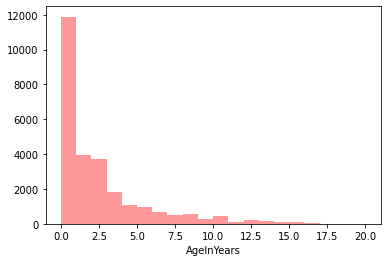

In [180]:
sns.distplot(train.AgeInYears, bins = 20, kde=False, color='red')

In [181]:
train = train.drop(['ageuponoutcome'], axis=1)
test = test.drop(['ageuponoutcome'], axis=1)

In [182]:
train.head() 

,datetime,outcometype,animaltype,sexuponoutcome,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2


## DATETIME

### Part of the Day

In [183]:
def setPartOfTheDay(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [184]:
train['partOfTheDay'] = train.datetime.dt.hour.apply(setPartOfTheDay)
test['partOfTheDay'] = test.datetime.dt.hour.apply(setPartOfTheDay)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


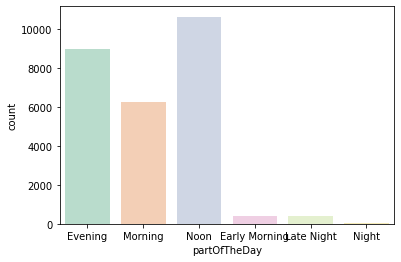

In [185]:
sns.countplot(train.partOfTheDay, palette='Pastel2')

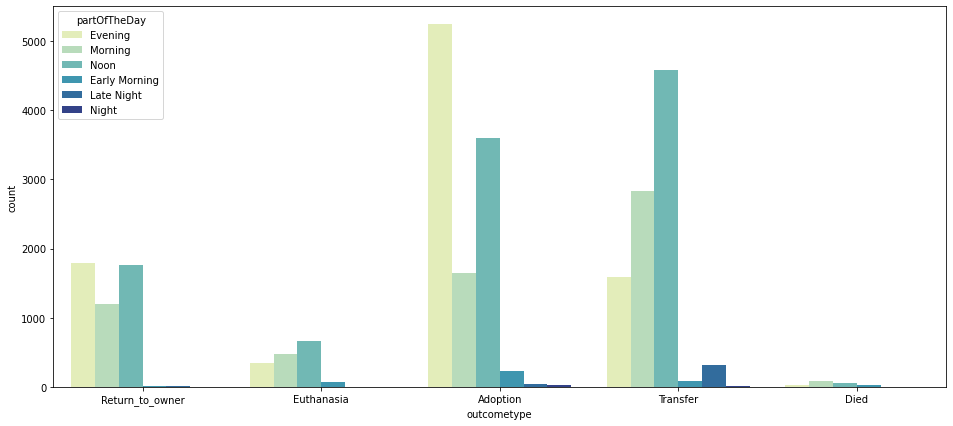

In [186]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='partOfTheDay', palette='YlGnBu')

### Weekend or Weekdays

In [187]:
def setWeekend(x):
  if x in [0,1,2,3,4] :
    return 0
  elif x in [5,6]:
    return 1

In [188]:
train['weekend'] = train.datetime.dt.dayofweek.apply(setWeekend)
test['weekend'] = test.datetime.dt.dayofweek.apply(setWeekend)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


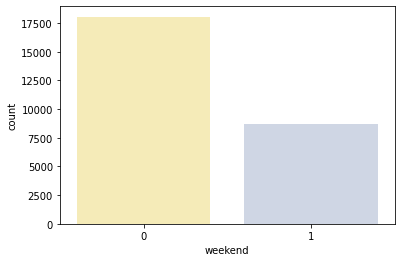

In [189]:
sns.countplot(train.weekend, palette='Pastel2_r')

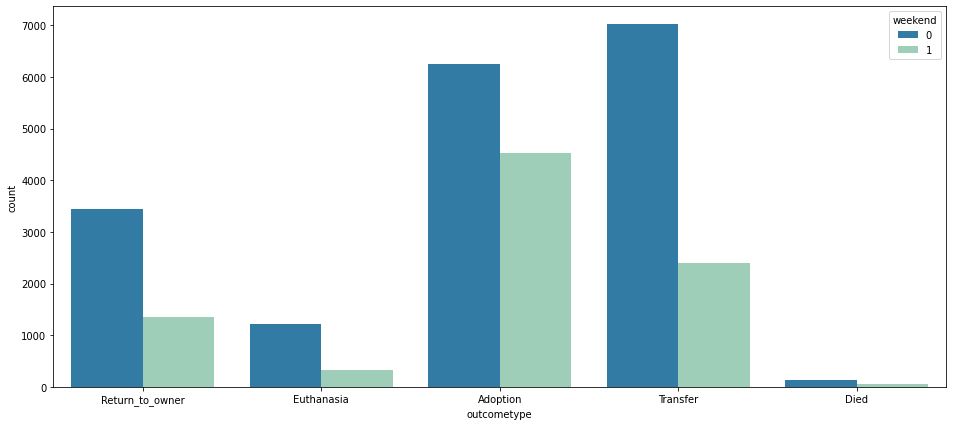

In [190]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='weekend', palette='YlGnBu_r')

### Year

In [191]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
test['year'] = pd.DatetimeIndex(test['datetime']).year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


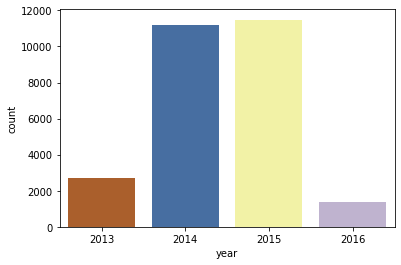

In [192]:
sns.countplot(train.year, palette='Accent_r')

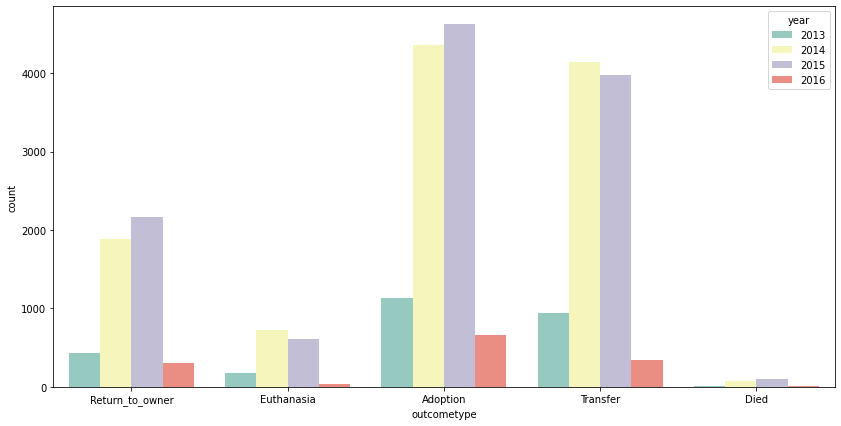

In [193]:
f, (ax1) = plt.subplots(1, figsize=(14, 7))
sns.countplot(data=train, x='outcometype',hue='year', palette='Set3')

### Month

In [194]:
train['month'] = pd.DatetimeIndex(train['datetime']).month
test['month'] = pd.DatetimeIndex(test['datetime']).month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


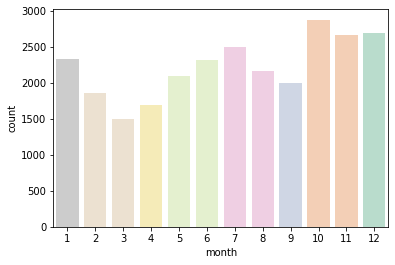

In [195]:
sns.countplot(train.month, palette='Pastel2_r')

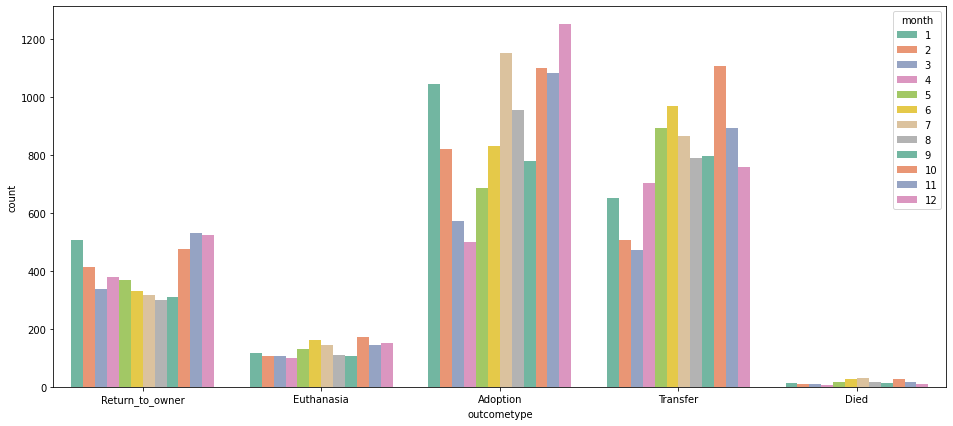

In [196]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='month', palette='Set2')

### Day of week

In [197]:
def setDayOfWeek(x):
  if x == 0:
    return 'Mon'
  elif x == 1:
    return 'Tue'
  elif x == 2:
    return 'Wed'
  elif x == 3:
    return 'Thu'
  elif x == 4:
    return 'Fri'
  elif x == 5:
    return 'Sat'
  elif x == 6:
    return 'Sun'    

In [198]:
train['dayOfWeek'] = train.datetime.dt.dayofweek.apply(setDayOfWeek)
test['dayOfWeek'] = test.datetime.dt.dayofweek.apply(setDayOfWeek)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


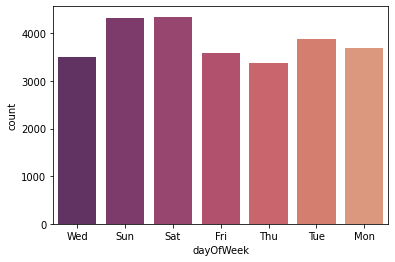

In [199]:
sns.countplot(train.dayOfWeek, palette='flare_r')

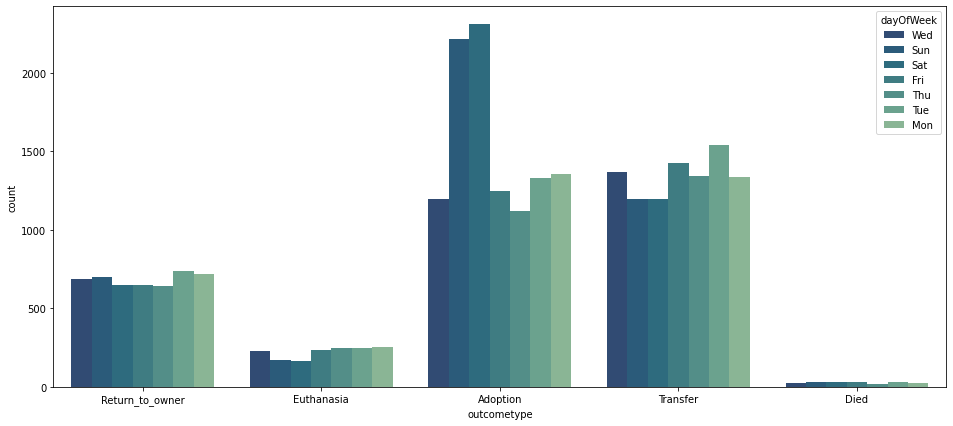

In [200]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='dayOfWeek', palette='crest_r')

### Hour

In [201]:
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
test['hour'] = pd.DatetimeIndex(test['datetime']).hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


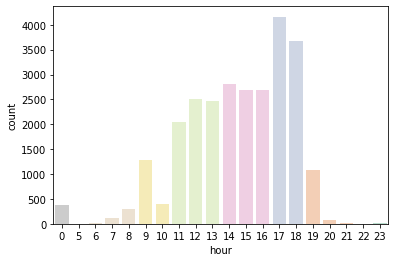

In [202]:
sns.countplot(train.hour, palette='Pastel2_r')

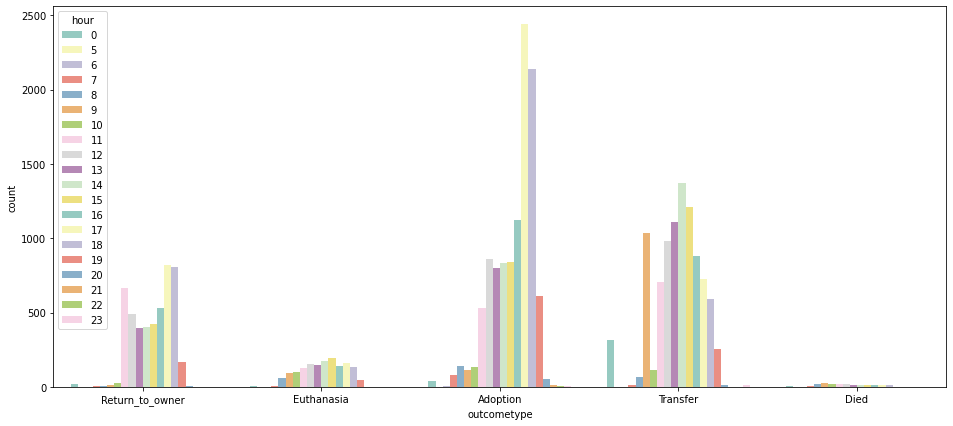

In [203]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='hour', palette='Set3')

### Season

In [204]:
def setSeason(x):
  if x in [12,1,2]:
    return 'Winter'
  elif x in [3,4,5]:
    return 'Spring'
  elif x in [6,7,8]:
    return 'Summer'
  elif x in [9,10,11]:
    return 'Autumn'

In [205]:
train['season'] = train.datetime.dt.month.apply(setSeason)
test['season'] = test.datetime.dt.month.apply(setSeason)

In [206]:
train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


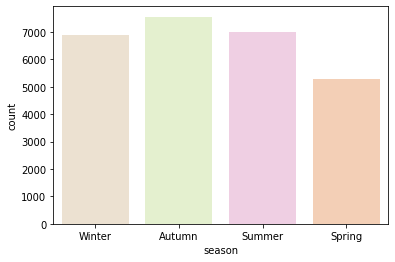

In [207]:
sns.countplot(train.season, palette='Pastel2_r')

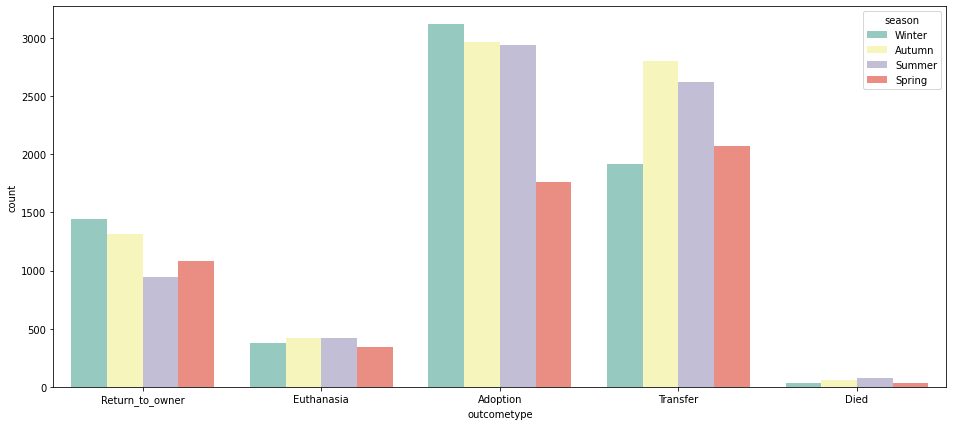

In [208]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='season', palette='Set3')

In [209]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,Evening,0,2014,2,Wed,18,Winter
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2,Morning,1,2015,1,Sat,12,Winter
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,Morning,0,2013,11,Fri,12,Autumn


## GENDER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


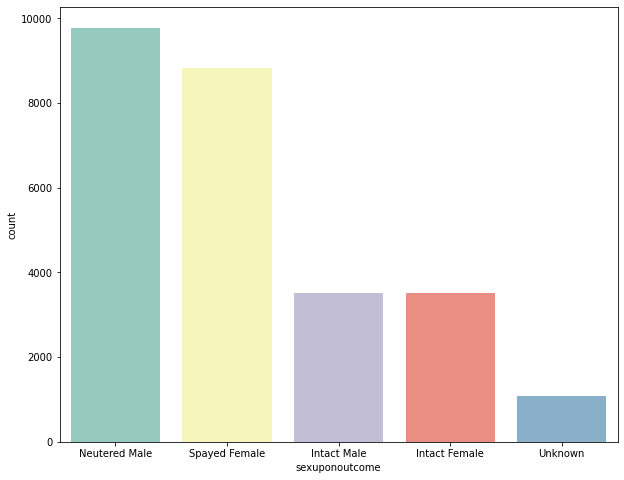

In [210]:
plt.figure(figsize=(10,8))
sns.countplot(train.sexuponoutcome, palette='Set3')

### Is neureted?

In [211]:
def isNeutered(dataFrame):
    dataFrame['isNeutered'] = pd.np.where(dataFrame.sexuponoutcome.str.contains("Neutered"), 1, 
                                          pd.np.where(dataFrame.sexuponoutcome.str.contains("Spayed"), 1, 0))
    return dataFrame

In [212]:
train = isNeutered(train)
test = isNeutered(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


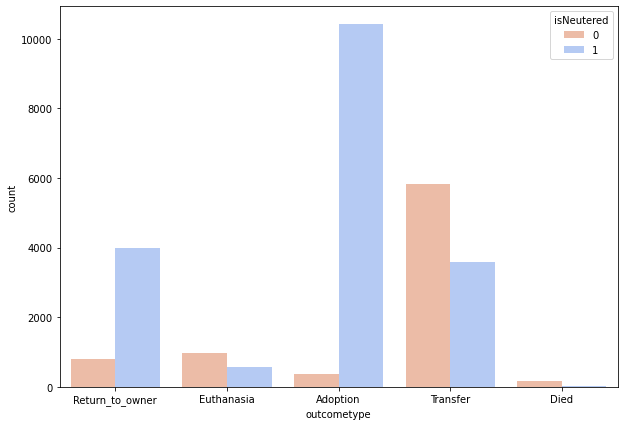

In [213]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='isNeutered', palette='coolwarm_r')

In [214]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sexuponoutcome.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sexuponoutcome.str.contains("Male"), "Male", "None"))
    return dataFrame

In [215]:
train= setSex(train)
test= setSex(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,Evening,0,2014,2,Wed,18,Winter,1,Male
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn,1,Female
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2,Morning,1,2015,1,Sat,12,Winter,1,Male
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer,0,Male
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,Morning,0,2013,11,Fri,12,Autumn,1,Male


## BREED

In [217]:
train.breed.unique().size

1380

Mix or Pure

In [218]:
import re
train['breedType'] = train.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')
                        
test['breedType'] = test.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')                        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


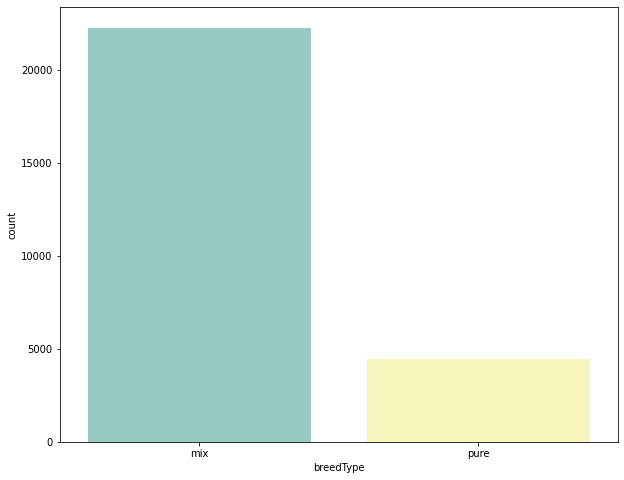

In [219]:
plt.figure(figsize=(10,8))
sns.countplot(train.breedType, palette='Set3')

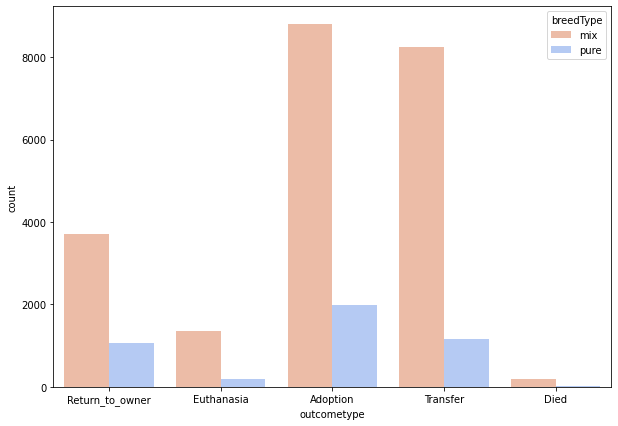

In [220]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='breedType', palette='coolwarm_r')

### Top 50 Breeds

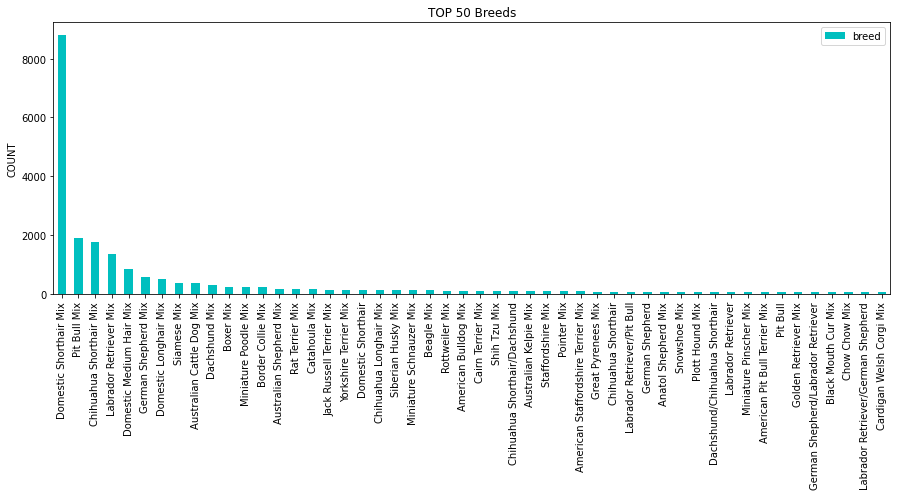

In [221]:
fig = plt.figure(figsize=(15,5))
plt.title('TOP 50 Breeds')
plt.ylabel('COUNT')
train['breed'].value_counts()[:50].plot(kind='bar', color='c')
plt.legend()
plt.show()

In [222]:
n = 50
mostCommonBreeds = train['breed'].value_counts()[:n].index.tolist()
train['breedIs'] = 'other'
test['breedIs'] = 'other'
for i in mostCommonBreeds:
  train['breedIs'][train['breed'] == i] = i
  test['breedIs'][test['breed'] == i] = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [223]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,...,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,...,0,2014,2,Wed,18,Winter,1,Male,mix,other
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,...,1,2013,10,Sun,12,Autumn,1,Female,mix,Domestic Shorthair Mix
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2,...,1,2015,1,Sat,12,Winter,1,Male,mix,Pit Bull Mix
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,...,0,2014,7,Fri,19,Summer,0,Male,mix,Domestic Shorthair Mix
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,...,0,2013,11,Fri,12,Autumn,1,Male,pure,other


In [224]:
test.breedIs.unique().size

51

In [225]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,...,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,...,0,2014,2,Wed,18,Winter,1,Male,mix,other
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,...,1,2013,10,Sun,12,Autumn,1,Female,mix,Domestic Shorthair Mix
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2,...,1,2015,1,Sat,12,Winter,1,Male,mix,Pit Bull Mix
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,...,0,2014,7,Fri,19,Summer,0,Male,mix,Domestic Shorthair Mix
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,...,0,2013,11,Fri,12,Autumn,1,Male,pure,other


## COLOR

In [226]:
color_counts = train['color'].value_counts()
color_counts.head(20)

Black/White            2824
Black                  2288
Brown Tabby            1631
Brown Tabby/White       939
White                   930
Brown/White             884
Orange Tabby            841
Tan/White               773
Tricolor                752
Blue/White              702
Black/Tan               672
White/Black             643
Brown                   639
Tan                     628
White/Brown             569
Tortie                  529
Calico                  517
Orange Tabby/White      455
Brown Brindle/White     450
Blue                    449
Name: color, dtype: int64

In [227]:
train['isMultiColor'] = train['color'].apply(lambda x : 1 if '/' in x else 0)
test['isMultiColor'] = test['color'].apply(lambda x : 1 if '/' in x else 0)

In [228]:
train = train.drop(['color'], axis=1)
test = test.drop(['color'], axis=1)

## Cats and Dogs

Kediler için tüm modellerim büyük farkla daha iyi sonuç verdiği için datayı kediler ve köpekler olarak iki ayrı şekilde train edip test datasını da ikiye bölerek predict ettim. Bu yüzden aşağıdaki kod satırı ile traini ayırarak 'dogs' ve 'cats' oluşturdum.

In [229]:
train = train.drop(['breed'], axis=1)
cats = train.loc[train['animaltype'] == 'Cat']
cats = cats.drop(['animaltype'], axis=1)
cats = cats.reset_index(drop=True)

cats.animaltype

In [230]:
cats.head()

,outcometype,sexuponoutcome,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs,isMultiColor
0,Euthanasia,Spayed Female,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn,1,Female,mix,Domestic Shorthair Mix,0
1,Transfer,Intact Male,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer,0,Male,mix,Domestic Shorthair Mix,0
2,Transfer,Intact Male,1,21,1,0,0,Noon,1,2015,3,Sat,13,Spring,0,Male,mix,Domestic Shorthair Mix,0
3,Transfer,Unknown,0,21,1,0,0,Evening,0,2015,4,Thu,17,Spring,0,None,mix,Domestic Shorthair Mix,0
4,Transfer,Unknown,0,730,0,24,2,Noon,0,2013,12,Thu,15,Winter,0,None,mix,Domestic Shorthair Mix,0




# MODELS

In [231]:
!pip install pytorch-tabnet

## Imports

In [269]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
import xgboost as xgb


In [233]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
np.random.seed(0)


import os
from pathlib import Path

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
%reload_ext autoreload


In [235]:
cats

,outcometype,sexuponoutcome,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs,isMultiColor
0,Euthanasia,Spayed Female,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn,1,Female,mix,Domestic Shorthair Mix,0
1,Transfer,Intact Male,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer,0,Male,mix,Domestic Shorthair Mix,0
2,Transfer,Intact Male,1,21,1,0,0,Noon,1,2015,3,Sat,13,Spring,0,Male,mix,Domestic Shorthair Mix,0
3,Transfer,Unknown,0,21,1,0,0,Evening,0,2015,4,Thu,17,Spring,0,None,mix,Domestic Shorthair Mix,0
4,Transfer,Unknown,0,730,0,24,2,Noon,0,2013,12,Thu,15,Winter,0,None,mix,Domestic Shorthair Mix,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,Transfer,Intact Male,0,150,0,5,0,Morning,1,2014,8,Sun,9,Summer,0,Male,mix,Domestic Shorthair Mix,0
11113,Transfer,Intact Male,0,30,1,1,0,Morning,0,2015,5,Thu,11,Spring,0,Male,mix,Domestic Shorthair Mix,1
11114,Transfer,Spayed Female,0,90,0,3,0,Evening,0,2016,1,Wed,18,Winter,1,Female,mix,Domestic Shorthair Mix,0
11115,Transfer,Intact Male,0,28,1,0,0,Morning,1,2014,4,Sun,12,Spring,0,Male,mix,Domestic Shorthair Mix,0


Cats

CTest datasının kedi ve köpeklere ayrılması

In [236]:
if "Set" not in cats.columns:
    cats["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(cats.shape[0],))


In [237]:
cats

,outcometype,sexuponoutcome,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs,isMultiColor,Set
0,Euthanasia,Spayed Female,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn,1,Female,mix,Domestic Shorthair Mix,0,train
1,Transfer,Intact Male,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer,0,Male,mix,Domestic Shorthair Mix,0,train
2,Transfer,Intact Male,1,21,1,0,0,Noon,1,2015,3,Sat,13,Spring,0,Male,mix,Domestic Shorthair Mix,0,train
3,Transfer,Unknown,0,21,1,0,0,Evening,0,2015,4,Thu,17,Spring,0,None,mix,Domestic Shorthair Mix,0,train
4,Transfer,Unknown,0,730,0,24,2,Noon,0,2013,12,Thu,15,Winter,0,None,mix,Domestic Shorthair Mix,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,Transfer,Intact Male,0,150,0,5,0,Morning,1,2014,8,Sun,9,Summer,0,Male,mix,Domestic Shorthair Mix,0,train
11113,Transfer,Intact Male,0,30,1,1,0,Morning,0,2015,5,Thu,11,Spring,0,Male,mix,Domestic Shorthair Mix,1,train
11114,Transfer,Spayed Female,0,90,0,3,0,Evening,0,2016,1,Wed,18,Winter,1,Female,mix,Domestic Shorthair Mix,0,valid
11115,Transfer,Intact Male,0,28,1,0,0,Morning,1,2014,4,Sun,12,Spring,0,Male,mix,Domestic Shorthair Mix,0,train


In [238]:
train_indices = cats[cats.Set=="train"].index
valid_indices = cats[cats.Set=="valid"].index
test_indices = cats[cats.Set=="test"].index

In [239]:
tr_len = len(train_indices)
val_len = len(valid_indices)
test_len = len(test_indices)
print(tr_len)
print(val_len)
print(test_len)

8935
1079
1103


In [240]:
len(train_indices)

8935

In [241]:
cats.head()

,outcometype,sexuponoutcome,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs,isMultiColor,Set
0,Euthanasia,Spayed Female,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn,1,Female,mix,Domestic Shorthair Mix,0,train
1,Transfer,Intact Male,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer,0,Male,mix,Domestic Shorthair Mix,0,train
2,Transfer,Intact Male,1,21,1,0,0,Noon,1,2015,3,Sat,13,Spring,0,Male,mix,Domestic Shorthair Mix,0,train
3,Transfer,Unknown,0,21,1,0,0,Evening,0,2015,4,Thu,17,Spring,0,None,mix,Domestic Shorthair Mix,0,train
4,Transfer,Unknown,0,730,0,24,2,Noon,0,2013,12,Thu,15,Winter,0,None,mix,Domestic Shorthair Mix,0,train


In [242]:
cats.dtypes

outcometype       object
sexuponoutcome    object
hasName            int64
AgeInDays          int64
isPuppy            int64
AgeInMonths        int64
AgeInYears         int64
partOfTheDay      object
weekend            int64
year               int64
month              int64
dayOfWeek         object
hour               int64
season            object
isNeutered         int64
sex               object
breedType         object
breedIs           object
isMultiColor       int64
Set               object
dtype: object

In [243]:
nunique = cats.nunique()
types = cats.dtypes

categorical_columns = []
categorical_dims =  {}
for col in cats.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, cats[col].nunique())
        l_enc = LabelEncoder()
        cats[col] = cats[col].fillna("VV_likely")
        cats[col] = l_enc.fit_transform(cats[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        cats.fillna(cats.loc[train_indices, col].mean(), inplace=True)

outcometype 5
sexuponoutcome 5
hasName 2
AgeInDays 43
isPuppy 2
AgeInMonths 32
AgeInYears 21
partOfTheDay 6
weekend 2
year 4
month 12
dayOfWeek 7
hour 19
season 4
isNeutered 2
sex 3
breedType 2
breedIs 7
isMultiColor 2
Set 3


In [244]:
cats.dtypes

outcometype       int64
sexuponoutcome    int64
hasName           int64
AgeInDays         int64
isPuppy           int64
AgeInMonths       int64
AgeInYears        int64
partOfTheDay      int64
weekend           int64
year              int64
month             int64
dayOfWeek         int64
hour              int64
season            int64
isNeutered        int64
sex               int64
breedType         int64
breedIs           int64
isMultiColor      int64
Set               int64
dtype: object

In [245]:
categorical_columns

['outcometype',
 'sexuponoutcome',
 'hasName',
 'AgeInDays',
 'isPuppy',
 'AgeInMonths',
 'AgeInYears',
 'partOfTheDay',
 'weekend',
 'year',
 'month',
 'dayOfWeek',
 'hour',
 'season',
 'isNeutered',
 'sex',
 'breedType',
 'breedIs',
 'isMultiColor',
 'Set']

In [246]:
cats.head()

,outcometype,sexuponoutcome,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs,isMultiColor,Set
0,2,3,1,23,0,12,1,3,1,0,9,3,8,0,1,0,0,3,0,1
1,4,1,0,9,1,0,0,1,0,1,6,0,15,2,0,1,0,3,0,1
2,4,1,1,9,1,0,0,5,1,2,2,2,9,1,0,1,0,3,0,1
3,4,4,0,9,1,0,0,1,0,2,3,4,13,1,0,2,0,3,0,1
4,4,4,0,24,0,13,2,5,0,0,11,4,11,3,0,2,0,3,0,1


In [247]:
cats.dtypes

outcometype       int64
sexuponoutcome    int64
hasName           int64
AgeInDays         int64
isPuppy           int64
AgeInMonths       int64
AgeInYears        int64
partOfTheDay      int64
weekend           int64
year              int64
month             int64
dayOfWeek         int64
hour              int64
season            int64
isNeutered        int64
sex               int64
breedType         int64
breedIs           int64
isMultiColor      int64
Set               int64
dtype: object

In [248]:
unsued_feat = ['Set']
target = 'outcometype'
features = [ col for col in cats.columns if col not in unsued_feat+[target]]
print(len(features),features)

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_idxs),cat_idxs)

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_dims),cat_dims)

18 ['sexuponoutcome', 'hasName', 'AgeInDays', 'isPuppy', 'AgeInMonths', 'AgeInYears', 'partOfTheDay', 'weekend', 'year', 'month', 'dayOfWeek', 'hour', 'season', 'isNeutered', 'sex', 'breedType', 'breedIs', 'isMultiColor']
18 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
18 [5, 2, 43, 2, 32, 21, 6, 2, 4, 12, 7, 19, 4, 2, 3, 2, 7, 2]


In [249]:
features

['sexuponoutcome',
 'hasName',
 'AgeInDays',
 'isPuppy',
 'AgeInMonths',
 'AgeInYears',
 'partOfTheDay',
 'weekend',
 'year',
 'month',
 'dayOfWeek',
 'hour',
 'season',
 'isNeutered',
 'sex',
 'breedType',
 'breedIs',
 'isMultiColor']

In [290]:
NB_TASKS = 5


# no multi tasking
X_train = cats[features].values[train_indices]
y_train = cats['outcometype'].values[train_indices].reshape(-1,1)
y_train = np.hstack([y_train]*NB_TASKS)


X_valid = cats[features].values[valid_indices]
y_valid = cats['outcometype'].values[valid_indices].reshape(-1,1)
y_valid = np.hstack([y_valid]*NB_TASKS)

X_test = cats[features].values[test_indices]
y_test = cats[target].values[test_indices].reshape(-1,1)
y_test = np.hstack([y_test]*NB_TASKS)



In [292]:
y_test.shape

(1103, 5)

In [287]:
y_test

array([[12],
       [10],
       [11],
       ...,
       [10],
       [13],
       [12]])

In [251]:
cats[features]

,sexuponoutcome,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex,breedType,breedIs,isMultiColor
0,3,1,23,0,12,1,3,1,0,9,3,8,0,1,0,0,3,0
1,1,0,9,1,0,0,1,0,1,6,0,15,2,0,1,0,3,0
2,1,1,9,1,0,0,5,1,2,2,2,9,1,0,1,0,3,0
3,4,0,9,1,0,0,1,0,2,3,4,13,1,0,2,0,3,0
4,4,0,24,0,13,2,5,0,0,11,4,11,3,0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,1,0,16,0,5,0,3,1,1,7,3,5,2,0,1,0,3,0
11113,1,0,11,1,1,0,3,0,2,4,4,7,1,0,1,0,3,1
11114,3,0,14,0,3,0,1,0,3,0,6,14,3,1,0,0,3,0
11115,1,0,10,1,0,0,3,1,1,3,3,8,1,0,1,0,3,0


In [252]:
cats[features].values

array([[ 3,  1, 23, ...,  0,  3,  0],
       [ 1,  0,  9, ...,  0,  3,  0],
       [ 1,  1,  9, ...,  0,  3,  0],
       ...,
       [ 3,  0, 14, ...,  0,  3,  0],
       [ 1,  0, 10, ...,  0,  3,  0],
       [ 1,  0, 23, ...,  0,  3,  1]])

In [253]:
print(len(cats))
print(len(train_indices))

11117
8935


In [254]:
cats[features].values

array([[ 3,  1, 23, ...,  0,  3,  0],
       [ 1,  0,  9, ...,  0,  3,  0],
       [ 1,  1,  9, ...,  0,  3,  0],
       ...,
       [ 3,  0, 14, ...,  0,  3,  0],
       [ 1,  0, 10, ...,  0,  3,  0],
       [ 1,  0, 23, ...,  0,  3,  1]])

In [255]:
y_train

array([[2],
       [4],
       [4],
       ...,
       [4],
       [4],
       [4]])

In [256]:
X_train

array([[ 3,  1, 23, ...,  0,  3,  0],
       [ 1,  0,  9, ...,  0,  3,  0],
       [ 1,  1,  9, ...,  0,  3,  0],
       ...,
       [ 1,  0, 11, ...,  0,  3,  1],
       [ 1,  0, 10, ...,  0,  3,  0],
       [ 1,  0, 23, ...,  0,  3,  1]])

In [257]:
train_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     9,    10,
               11,
            ...
            11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11115,
            11116],
           dtype='int64', length=8935)

In [258]:
train_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     9,    10,
               11,
            ...
            11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11115,
            11116],
           dtype='int64', length=8935)

In [259]:
# test = test.drop(['breed'], axis=1)
# test_cats = test.loc[test['animaltype'] == 'Cat']
# cat_ids = test_cats['id']

# test_cats = test_cats.drop('id', axis = 1)
# test_cats = pd.get_dummies(test_cats)

# test = test.drop('id', axis = 1)
# test = pd.get_dummies(test)

In [260]:
# from tqdm.notebook import tqdm

# nunique = cats.nunique()
# types = cats.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in tqdm(cats.columns):
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, cats[col].nunique())
#         l_enc = LabelEncoder()
#         cats[col] = cats[col].fillna("NaN")
#         cats[col] = l_enc.fit_transform(cats[col].values)
#         try:
#             cats[col] = cats[col].fillna("NaN")
#             cats[col] = l_enc.transform(cats[col].values)
#         except:
#             print(f"Column {col} does not exist in test set")
#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#     else:
#         training_mean = cats.loc[cats, col].mean()
#         train.fillna(training_mean, inplace=True)
#         test.fillna(training_mean, inplace=True)

##Training

In [293]:
import torch

clf = TabNetMultiTaskClassifier(n_steps=1,
                                cat_idxs=cat_idxs,
                                cat_dims=cat_dims,
                                cat_emb_dim=1,
                                optimizer_fn=torch.optim.Adam,
                                optimizer_params=dict(lr=2e-2),
                                scheduler_params={"step_size":50,
                                                  "gamma":0.9},
                                scheduler_fn=torch.optim.lr_scheduler.StepLR,
                                mask_type='entmax', 
                                lambda_sparse=0, 
)

Device used : cuda


In [294]:
y_train

array([[2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       ...,
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4]])

In [295]:
max_epochs = 1000
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set = [(X_train, y_train),[X_valid, y_valid]],
    eval_name= ['train', 'valid'],
    max_epochs=max_epochs ,
    patience=50, 
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    loss_fn = [torch.nn.functional.cross_entropy]*NB_TASKS,
    drop_last=True,
)

epoch 0  | loss: 1.4751  | train_logloss: 1.29554 | valid_logloss: 1.29172 |  0:00:01s
epoch 1  | loss: 1.03158 | train_logloss: 0.97881 | valid_logloss: 0.99855 |  0:00:02s
epoch 2  | loss: 0.82634 | train_logloss: 0.96931 | valid_logloss: 0.99686 |  0:00:03s
epoch 3  | loss: 0.75328 | train_logloss: 0.7918  | valid_logloss: 0.80695 |  0:00:04s
epoch 4  | loss: 0.71233 | train_logloss: 0.73545 | valid_logloss: 0.74352 |  0:00:05s
epoch 5  | loss: 0.68023 | train_logloss: 0.7306  | valid_logloss: 0.73753 |  0:00:06s
epoch 6  | loss: 0.67592 | train_logloss: 0.70357 | valid_logloss: 0.71369 |  0:00:08s
epoch 7  | loss: 0.66144 | train_logloss: 0.69763 | valid_logloss: 0.70768 |  0:00:09s
epoch 8  | loss: 0.6496  | train_logloss: 0.7104  | valid_logloss: 0.72867 |  0:00:10s
epoch 9  | loss: 0.63881 | train_logloss: 0.6756  | valid_logloss: 0.68768 |  0:00:11s
epoch 10 | loss: 0.62724 | train_logloss: 0.67718 | valid_logloss: 0.69155 |  0:00:12s
epoch 11 | loss: 0.62717 | train_logloss: 0

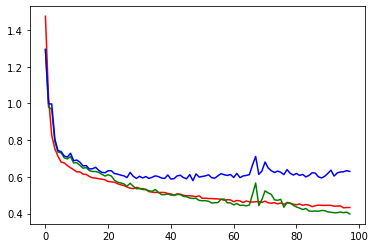

In [297]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')


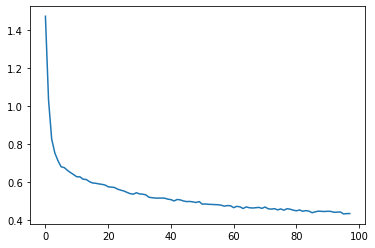

In [298]:
plt.plot(clf.history['loss'])


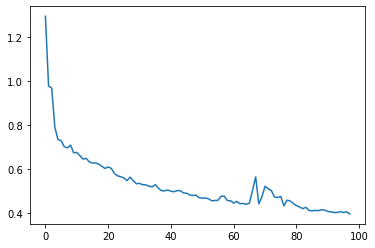

In [299]:
plt.plot(clf.history['train_logloss'])


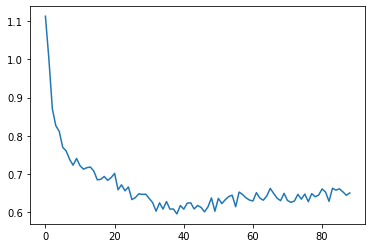

In [266]:
plt.plot(clf.history['valid_logloss'])


In [324]:
preds = clf.predict_proba(X_test)
test_aucs = [roc_auc_score(y_score=task_pred[:,1], y_true=y_test[:, task_idx]) 
             for task_idx, task_pred in enumerate(preds[:-1])] # don't compute on random last one

print(f"BEST VALID SCORE FOR : {clf.best_cost}")
print(f"FINAL AUC SCORES FOR  : {test_aucs}")

ValueError: ignored

In [321]:
for task_idx, task_pred in enumerate(preds[:-1]):
  print(task_idx)

0
1
2
3


In [319]:
y = np.array(preds)
y.shape

(5, 1103, 5)

In [122]:
predict_classes = clf.predict(X_test)


### Decision Tree Classifier

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, clf.predict(X_test)))

[[348   0   0   0  75]
 [  1   2   0   0  12]
 [  7   1   0   0  62]
 [ 21   0   0   0  18]
 [ 62   1   0   0 493]]
0.7642792384406165


### LogisticRegression

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_winner = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


77.73

### KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, y_train.ravel())  

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.69

### Random Forest

In [126]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())
# rf_pred = rf.predict_proba(test)

rf.score(X_train, y_train.ravel())
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
acc_random_forest

99.53

In [127]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {  #12개의 모델을 5번 훈련시켜서 교차 검증을 수행한다.
    'n_estimators': [1000, 5000],
    'max_depth' : [6, 10, 12],
    'criterion' :['gini', 'entropy'],
    'random_state' : [0, 1]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.ravel())


CV_rfc.best_params_


{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 5000, 'random_state': 0}

Best params : {'criterion': 'entropy',
 'max_depth': 12,
 'n_estimators': 1000,
 'random_state': 1}


Feature Importance

In [128]:
rf_cats = RandomForestClassifier(criterion='entropy', 
                             n_estimators=1000,
                             min_samples_split=20,
                             min_samples_leaf=1,
                             max_depth = 12,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf_cats.fit(X_train, y_train)
rf_cat = rf_cats.predict_proba(X_test)
# rf_pred = rf.predict(test)

rf_cats.score(X_train, y_train)
acc_random_forest = round(rf_cats.score(X_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


82.28

<function matplotlib.pyplot.show>

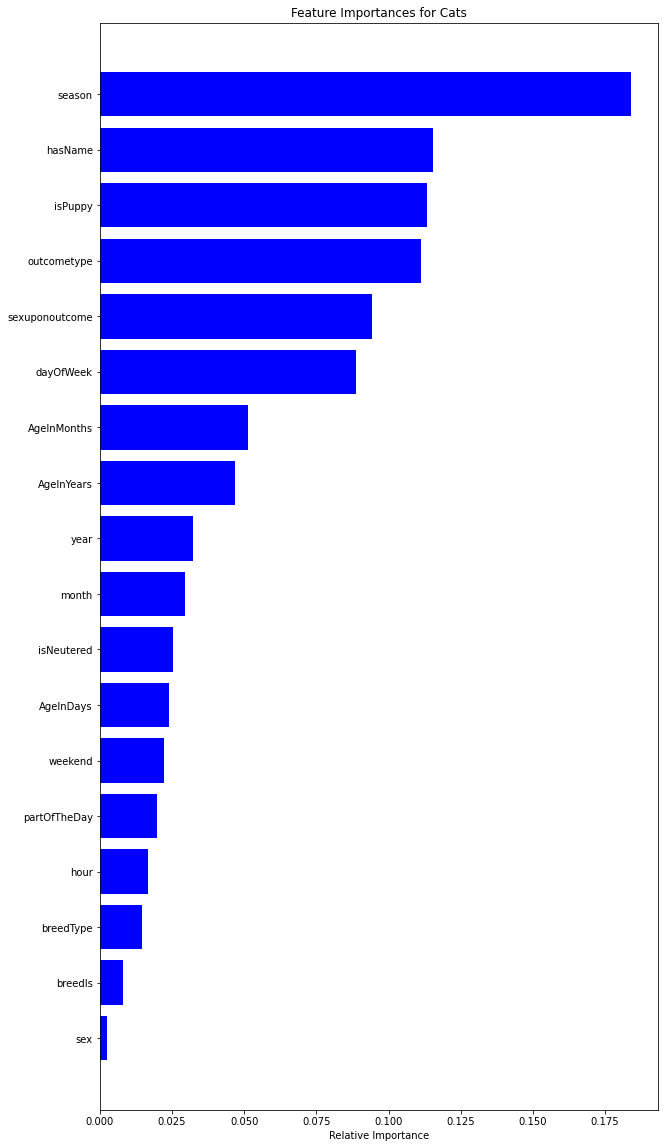

In [129]:
features=cats.columns
importances = rf_cats.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances for Cats')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show

Dogs

### XGBoost

ROC Curve

In [130]:
pip install scikit-plot

In [131]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

Without Grid Search and Parameters (Base)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.47101	validation_1-mlogloss:1.47068
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.36061	validation_1-mlogloss:1.36043
[2]	validation_0-mlogloss:1.26944	validation_1-mlogloss:1.26986
[3]	validation_0-mlogloss:1.1924	validation_1-mlogloss:1.19372
[4]	validation_0-mlogloss:1.12642	validation_1-mlogloss:1.12803
[5]	validation_0-mlogloss:1.06908	validation_1-mlogloss:1.07065
[6]	validation_0-mlogloss:1.01905	validation_1-mlogloss:1.02069
[7]	validation_0-mlogloss:0.975163	validation_1-mlogloss:0.976633
[8]	validation_0-mlogloss:0.936312	validation_1-mlogloss:0.937565
[9]	validation_0-mlogloss:0.90189	validation_1-mlogloss:0.902992
[10]	validation_0-mlogloss:0.871431	validation_1-mlogloss:0.872653
[11]	validation_0-mlogloss:0.844082	validation_1-mlogloss:0.845136
[12]	validation_0-mlogloss:0.819553	validation_1-mloglo

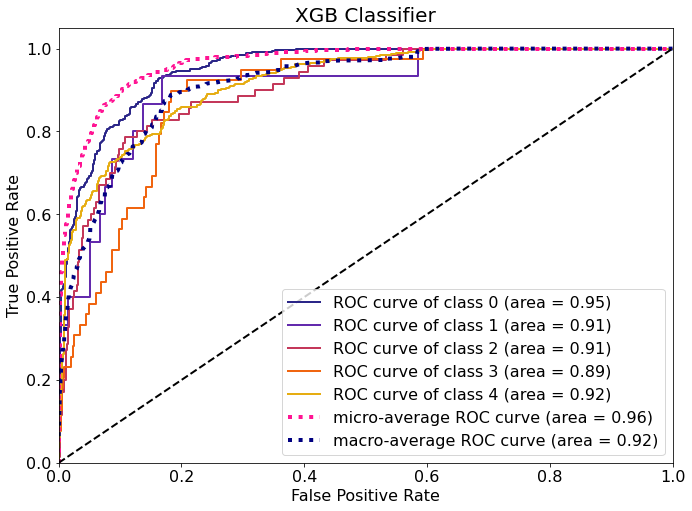

80.24


In [132]:
model = xgb.XGBClassifier()
model.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test,y_test)],
    early_stopping_rounds=50
    )
xgboost_pred = model.predict_proba(X_test)
score = model.score(X_train, y_train)
score = round(score * 100, 2)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print(score)

Grid Search

In [140]:
alg = xgb.XGBClassifier(objective='multi:softprob')
params = param_grid = {
    'n_estimators': [500, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [5,10,15],
    'subsample': [0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.02]
}
clf = GridSearchCV(alg, params, 
                        verbose=1,
                        scoring='neg_log_loss') #만약 NaN문제 발생시 error_score='raise' 추가

clf.fit(X_train,y_train)
pred = clf.predict_proba(test)
print(clf.best_score_)
print(clf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

KeyboardInterrupt: ignored

Best params : max_depth=5, n_estimators=1000, learning_rate=0.01,subsample=0.8, colsample_bytree=0.7

In [ ]:
test

In [ ]:
model = xgb.XGBClassifier(max_depth=5, missing=np.nan, n_estimators=500, learning_rate=0.01,  subsample=0.8, colsample_bytree=0.7, seed=1024,objective= 'multi:softprob')
    
model.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test, y_test)],
    early_stopping_rounds=50
    )

score = model.score(X_train, y_train)
xgb_pred_with_grid = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print(score)

### Gradient Boosting Classifier

In [134]:
import pandas as pd, sys, time
def gridsearch_gbm(params_grid, X_train, y_train):
    model_start = time.time()  
    gbc = GradientBoostingClassifier()
    best_model = GridSearchCV(gbc, param_grid=params_grid, n_jobs=-1)
    model_end = time.time()

    
    fit_start = time.time()
    best_model.fit(X_train, y_train)
    fit_end = time.time()
  
    
    return best_model

def gridsearch_stats(model, X_test, y_test):
    print(model.best_params_)
    
    probas = model.predict_proba(X_test)
    print(log_loss(y_test, probas))
    
    return probas

In [135]:
params = {
            'max_depth': [10,15,20,25],
            'min_samples_leaf': [100,500,1000], 
            "learning_rate": [0.03, 0.05], 
            "max_features": [10,15,20]
            }

gbm_gc = gridsearch_gbm(params, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tr

In [136]:
gbm_gc.best_params_

{'learning_rate': 0.05,
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 100}

In [137]:
gridsearch_stats(gbm_gc, X_test, y_test)

{'learning_rate': 0.05, 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 100}
0.4976839157880704


array([[3.81756174e-01, 3.44364671e-04, 6.64861324e-03, 7.06859410e-02,
        5.40564907e-01],
       [9.92582953e-01, 1.01591743e-04, 5.29010369e-04, 4.96223079e-04,
        6.29022144e-03],
       [1.05089794e-02, 7.19711619e-03, 4.40820311e-01, 1.78965152e-02,
        5.23577078e-01],
       ...,
       [1.04245088e-02, 9.22867674e-03, 8.20242355e-02, 4.99364666e-03,
        8.93328932e-01],
       [2.38428997e-03, 2.74820872e-03, 4.39132091e-02, 3.62515243e-03,
        9.47329140e-01],
       [4.88503473e-01, 2.11027632e-03, 7.65163377e-03, 1.15380204e-03,
        5.00580815e-01]])

In [138]:
probas = gbm_gc.predict_proba(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators=500, 
                                 n_jobs=-1, random_state=0, max_features= 15, 
                            max_depth= 5), 
                              X_train, y_train, cv=5))
print('')
print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=1000, 
                                 n_jobs=-1, random_state=1, max_features=60, 
                            max_depth= 5), 
                              X_train, y_train, cv=5)),4)))

Cats

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators=500, 
                                 n_jobs=-1, random_state=0, max_features= 15, 
                            max_depth= 5), 
                              X_train_cats, y_train_cats, cv=5))
print('')
print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=500, 
                                 n_jobs=-1, random_state=42, max_features= 10, 
                            max_depth= 5), 
                              X_train_cats, y_train_cats, cv=5)),4)))

### GaussianNB

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train,y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train_cats,y_train_cats)  
Y_pred = gaussian.predict(X_test_cats)  
acc_gaussian = round(gaussian.score(X_train_cats, y_train_cats) * 100, 2)
acc_gaussian

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train_dogs,y_train_dogs)  
Y_pred = gaussian.predict(X_test_dogs)  
acc_gaussian = round(gaussian.score(X_train_dogs, y_train_dogs) * 100, 2)
acc_gaussian

### LightGBM

In [142]:
param = [{'n_estimators': [100, 500, 1000],
         'learning_rate': [0.1, 0.05, 0.01]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train, y_train)
print(name,': ',model.best_params_)
pred_y_cats = model.predict_proba(test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

LightGBM :  {'learning_rate': 0.05, 'n_estimators': 500}


ValueError: ignored

Best params : {'n_estimators': 1000,
               'learning_rate': 0.01}

In [ ]:
param = [{'n_estimators': [1000],
         'learning_rate': [0.01]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train, y_train)
lightgbm_pred = model.predict_proba(test)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='LightGBM Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Cats

In [ ]:
param = [{'n_estimators': [500],
         'learning_rate': [0.01],
          'max_depth' : [6]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train_cats, y_train_cats)
print(name,': ',model.best_params_)
lightgbm_pred_cats = model.predict_proba(test_cats)
print('train score: {}'.format(model.score(X_train_cats, y_train_cats)))
print('test score: {}'.format(model.score(X_test_cats, y_test_cats)))
skplt.metrics.plot_roc(y_test_cats, model.predict_proba(X_test_cats), title='LightGBM Classifier Cats', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

Dogs

In [ ]:
param = [{'n_estimators': [500],
         'learning_rate': [0.01]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train_dogs, y_train_dogs)
print(name,': ',model.best_params_)
lightgbm_pred_dogs = model.predict_proba(test_dogs)
print('train score: {}'.format(model.score(X_train_dogs, y_train_dogs)))
print('test score: {}'.format(model.score(X_test_dogs, y_test_dogs)))
skplt.metrics.plot_roc(y_test_dogs, model.predict_proba(X_test_dogs), title='LightGBM Classifier Dogs', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

# Submission

Cats and Dogs submission

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/sample_submission.csv.gz')

dog = submission[submission.ID.isin(dog_ids)]
cat = submission[submission.ID.isin(cat_ids)]

dog["ID"] = dog_ids
dog["Adoption"]= lightgbm_pred_dogs[:,0]
dog["Died"]= lightgbm_pred_dogs[:,1]
dog["Euthanasia"]= lightgbm_pred_dogs[:,2]
dog["Return_to_owner"]= lightgbm_pred_dogs[:,3]
dog["Transfer"]= lightgbm_pred_dogs[:,4]

cat["ID"] = cat_ids
cat["Adoption"]= lightgbm_pred_cats[:,0]
cat["Died"]= lightgbm_pred_cats[:,1]
cat["Euthanasia"]= lightgbm_pred_cats[:,2]
cat["Return_to_owner"]= lightgbm_pred_cats[:,3]
cat["Transfer"]= lightgbm_pred_cats[:,4]

frames = [dog, cat]
result = pd.concat(frames)
result = result.sort_values('ID')
result.to_csv("last_submission.csv",index=False)


In [ ]:
submission = pd.read_csv('/content/drive/My Drive/sample_submission.csv.gz')
submission["ID"] = np.arange(lightgbm_pred.shape[0])+1
submission["Adoption"]= lightgbm_pred[:,0]
submission["Died"]= lightgbm_pred[:,1]
submission["Euthanasia"]= lightgbm_pred[:,2]
submission["Return_to_owner"]= lightgbm_pred[:,3]
submission["Transfer"]= lightgbm_pred[:,4]
submission.to_csv("lightgbm_pred.csv",index=False)